In [19]:
import sys 
import numpy as np 
from scipy.stats import randint
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [20]:
df = pd.read_csv('./input/household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date','Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [21]:
df.head() 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [22]:
df = df.resample('H').mean()

In [23]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [24]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667
...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1.725900,0.061400,237.069667,7.216667,0.0,0.000000,12.866667
2010-11-26 18:00:00,1.573467,0.053700,237.531833,6.620000,0.0,0.000000,0.000000
2010-11-26 19:00:00,1.659333,0.060033,236.741000,7.056667,0.0,0.066667,0.000000


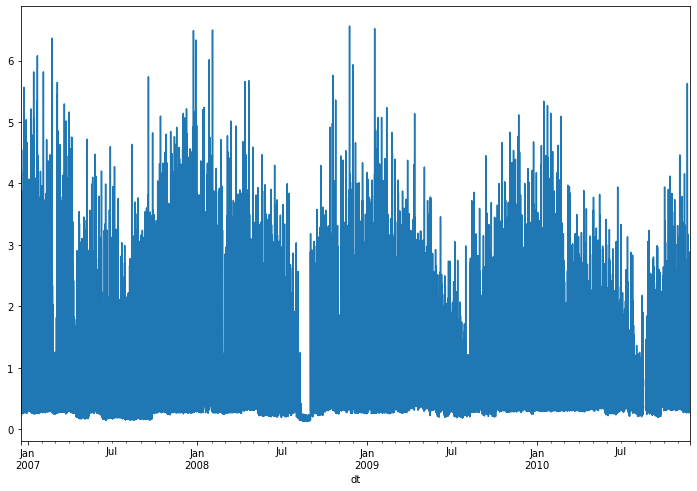

In [25]:
df["Global_active_power"].plot(figsize=(12,8))

In [155]:
df.isnull().sum()
columnarray = list(df.columns)

In [49]:
for j in range(0,7):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [67]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [99]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

In [262]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [263]:
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

In [264]:
timesteps=30
n_features=7
values = df_resample.values 

## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
print(values.shape)
# frame as supervised learning
reframed = series_to_supervised(scaled, timesteps, 1)

# drop columns we don't want to predict
# reframed.drop(reframed.columns[-6:], axis=1, inplace=True)
print(reframed)

(34589, 7)
       var1(t-30)  var2(t-30)  var3(t-30)  var4(t-30)  var5(t-30)  var6(t-30)  \
30       0.636816    0.295738    0.337945    0.631157         0.0    0.011366   
31       0.545045    0.103358    0.335501    0.541487         0.0    0.144652   
32       0.509006    0.110073    0.283802    0.502152         0.0    0.030869   
33       0.488550    0.096987    0.315987    0.481110         0.0    0.000000   
34       0.455597    0.099010    0.434417    0.449904         0.0    0.008973   
...           ...         ...         ...         ...         ...         ...   
34584    0.140459    0.118898    0.566977    0.137733         0.0    0.017588   
34585    0.058375    0.119113    0.664672    0.061215         0.0    0.009332   
34586    0.036080    0.061214    0.643624    0.038020         0.0    0.000000   
34587    0.027447    0.072191    0.731844    0.027738         0.0    0.000000   
34588    0.032471    0.141713    0.770186    0.032879         0.0    0.016870   

       var7(t-30

In [265]:
values = reframed.values
print(values.shape)
# inversed_values = scaler.inverse_transform(values[:,:7])
n_obs = n_features*timesteps
n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :n_obs], train[:, -n_features:]
test_X, test_y = test[:, :n_obs], test[:, -n_features:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], timesteps, n_features))
test_X = test_X.reshape((test_X.shape[0], timesteps,n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 


(34559, 217)
(8760, 30, 7) (8760, 7) (25799, 30, 7) (25799, 7)


In [266]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [269]:
# model = Sequential()
# model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dropout(0.2))
# #    model.add(LSTM(70))
# #    model.add(Dropout(0.3))
# model.add(Dense(7))
# model.compile(loss='mean_squared_error', optimizer='adam')
# history = model.fit(train_X, train_y, epochs=20, batch_size=20, validation_data=(test_X, test_y), verbose=1, shuffle=False)

model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.1))
model.add(Dense(n_features))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(train_X, train_y, epochs=10, batch_size=20, validation_data=(test_X, test_y), verbose=1, shuffle=False)

Train on 8760 samples, validate on 25799 samples
Epoch 1/10
8760/8760 [==============================] - 20s 2ms/sample - loss: 0.0260 - val_loss: 0.0195
Epoch 2/10
8760/8760 [==============================] - 19s 2ms/sample - loss: 0.0182 - val_loss: 0.0164
Epoch 3/10
8760/8760 [==============================] - 18s 2ms/sample - loss: 0.0167 - val_loss: 0.0154
Epoch 4/10
8760/8760 [==============================] - 19s 2ms/sample - loss: 0.0159 - val_loss: 0.0146
Epoch 5/10
8760/8760 [==============================] - 19s 2ms/sample - loss: 0.0153 - val_loss: 0.0142
Epoch 6/10
8760/8760 [==============================] - 19s 2ms/sample - loss: 0.0150 - val_loss: 0.0140
Epoch 7/10
8760/8760 [==============================] - 20s 2ms/sample - loss: 0.0149 - val_loss: 0.0140
Epoch 8/10
8760/8760 [==============================] - 21s 2ms/sample - loss: 0.0146 - val_loss: 0.0138
Epoch 9/10
8760/8760 [==============================] - 21s 2ms/sample - loss: 0.0145 - val_loss: 0.0138
Epoch 

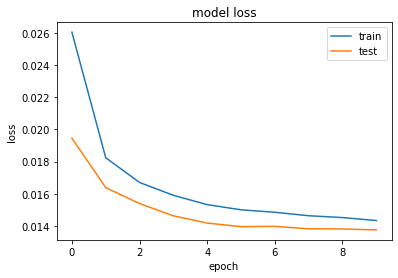

In [270]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [271]:
print(values.shape)
# make a prediction
yhat = model.predict(test_X)

print(test_X.shape)
yhat = yhat.reshape((test_X.shape[0], n_features))
print(yhat.shape)
# inv_yhat = np.concatenate((yhat, test_X), axis=1)
# print(inv_yhat)
inversed_values = scaler.inverse_transform(yhat)


# invert scaling for actual
test_y = test_y.reshape((len(test_y), 7))
# inv_y = np.concatenate((test_y, test_X[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(test_y)
# calculate RMSE
rmse = np.sqrt(mean_squared_error(test_y, yhat))
print('Test RMSE: %.3f' % rmse)


(34559, 217)
(25799, 30, 7)
(25799, 7)
Test RMSE: 0.117


In [272]:

plt.show()

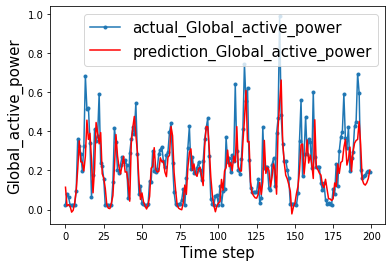

In [273]:
aa=[x for x in range(200)]
y=0
plt.plot(aa, test_y[:200,y], marker='.', label="actual_"+columnarray[y])
plt.plot(aa, yhat[:200,y], 'r', label="prediction_"+columnarray[y])
plt.ylabel(columnarray[y], size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)

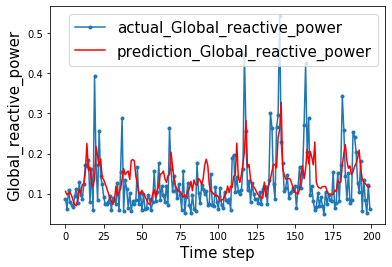

In [274]:
aa=[x for x in range(200)]
y=1
plt.plot(aa, test_y[:200,y], marker='.', label="actual_"+columnarray[y])
plt.plot(aa, yhat[:200,y], 'r', label="prediction_"+columnarray[y])
plt.ylabel(columnarray[y], size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)

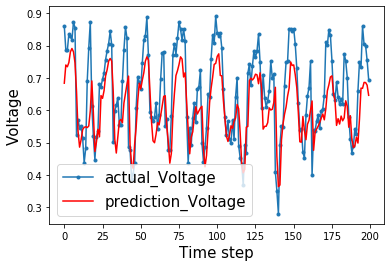

In [275]:
aa=[x for x in range(200)]
y=2
plt.plot(aa, test_y[:200,y], marker='.', label="actual_"+columnarray[y])
plt.plot(aa, yhat[:200,y], 'r', label="prediction_"+columnarray[y])
plt.ylabel(columnarray[y], size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)

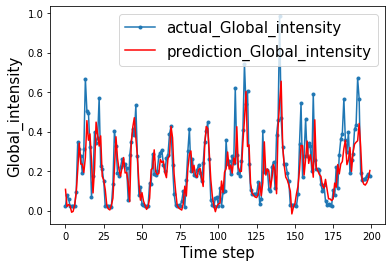

In [276]:
aa=[x for x in range(200)]
y=3
plt.plot(aa, test_y[:200,y], marker='.', label="actual_"+columnarray[y])
plt.plot(aa, yhat[:200,y], 'r', label="prediction_"+columnarray[y])
plt.ylabel(columnarray[y], size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)

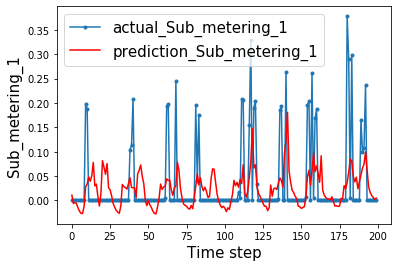

In [277]:
aa=[x for x in range(200)]
y=4
plt.plot(aa, test_y[:200,y], marker='.', label="actual_"+columnarray[y])
plt.plot(aa, yhat[:200,y], 'r', label="prediction_"+columnarray[y])
plt.ylabel(columnarray[y], size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)

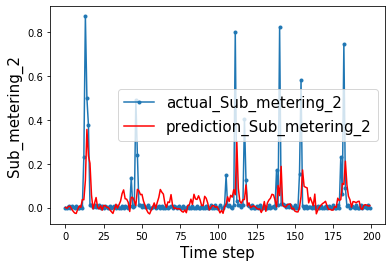

In [278]:
aa=[x for x in range(200)]
y=5
plt.plot(aa, test_y[:200,y], marker='.', label="actual_"+columnarray[y])
plt.plot(aa, yhat[:200,y], 'r', label="prediction_"+columnarray[y])
plt.ylabel(columnarray[y], size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)

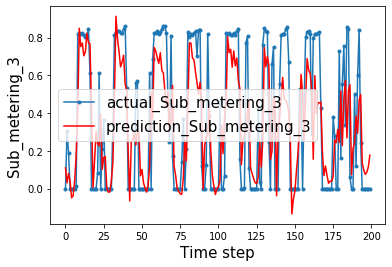

In [279]:
aa=[x for x in range(200)]
y=6
plt.plot(aa, test_y[:200,y], marker='.', label="actual_"+columnarray[y])
plt.plot(aa, yhat[:200,y], 'r', label="prediction_"+columnarray[y])
plt.ylabel(columnarray[y], size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)

In [280]:
test_X.shape

(25799, 30, 7)

In [281]:
train_X.shape

(8760, 30, 7)

In [282]:
test_X[0][0]

array([0.36525355, 0.08458889, 0.47831591, 0.35341942, 0.        ,
       0.00897344, 0.80897138])

In [283]:
values = df_resample.values 

## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [284]:
test_predictions=[]
periods=20
first_eval_batch=scaled[-30:]
print(first_eval_batch.shape)
current_batch=first_eval_batch.reshape(1,30,n_features)

for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    print(current_pred)
    test_predictions.append(current_pred)
    
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

(30, 7)
[0.1377139  0.10525858 0.58481765 0.13402283 0.00132007 0.00128577
 0.08777364]
[0.12581445 0.10314632 0.60187244 0.12354542 0.00229811 0.01114953
 0.10955922]
[0.11137024 0.10394679 0.6197325  0.11057304 0.00192479 0.01546062
 0.11297591]
[0.10126921 0.10573357 0.63117456 0.10150646 0.00101276 0.01796506
 0.11245646]
[ 9.7928628e-02  1.0730961e-01  6.3691759e-01  9.8382428e-02
 -1.7561950e-04  1.8928990e-02  1.1619237e-01]
[ 0.10317387  0.10866751  0.63673437  0.10314846 -0.00084434  0.01914709
  0.13291986]
[ 1.1969516e-01  1.1041546e-01  6.2828934e-01  1.1881568e-01
 -1.7677061e-04  1.9562613e-02  1.7126682e-01]
[0.14889523 0.11377676 0.6087773  0.14729632 0.0029649  0.0217568
 0.23670132]
[0.18710129 0.119817   0.57862824 0.18521342 0.00952782 0.02681178
 0.32433194]
[0.22451973 0.12817073 0.5446783  0.22253364 0.01899065 0.03420599
 0.415785  ]
[0.25055608 0.13700008 0.51737386 0.24832624 0.02892488 0.0428037
 0.48713395]
[0.26171422 0.14488873 0.50400233 0.25918072 0.0366

In [285]:
len(test_predictions)

20

In [286]:
true_predictions=scaler.inverse_transform(test_predictions)

In [287]:
forecast_index = pd.date_range(start='2010-11-26 22:00:00',periods=20,freq='H')

In [288]:
forecast=pd.DataFrame(columns=columnarray,index=forecast_index)

In [289]:
for index,x in enumerate(forecast.columns):
    forecast[x]=true_predictions[:,index]

In [290]:
true_predictions[:,0]

array([1.01040007, 0.93380892, 0.84083823, 0.77582263, 0.75432088,
       0.78808203, 0.89442187, 1.08236914, 1.32828369, 1.56912872,
       1.73671257, 1.8085323 , 1.80894817, 1.77074304, 1.71725379,
       1.66781949, 1.64128472, 1.64529959, 1.68395061, 1.74971073])

In [291]:
forecast

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2010-11-26 22:00:00,1.010400,0.081505,241.079234,4.239890,0.063847,0.059703,1.891522
2010-11-26 23:00:00,0.933809,0.079870,241.523810,3.947780,0.111152,0.517710,2.361001
2010-11-27 00:00:00,0.840838,0.080489,241.989377,3.586110,0.093096,0.717888,2.434631
2010-11-27 01:00:00,0.775823,0.081873,242.287643,3.333334,0.048984,0.834178,2.423437
2010-11-27 02:00:00,0.754321,0.083093,242.437349,3.246235,-0.008494,0.878936,2.503946
2010-11-27 03:00:00,0.788082,0.084145,242.432573,3.379112,-0.040838,0.889063,2.864423
2010-11-27 04:00:00,0.894422,0.085498,242.212432,3.815915,-0.008550,0.908357,3.690800
2010-11-27 05:00:00,1.082369,0.088101,241.703802,4.609955,0.143402,1.010241,5.100914
2010-11-27 06:00:00,1.328284,0.092778,240.917892,5.667083,0.460829,1.244960,6.989353
2010-11-27 07:00:00,1.569129,0.099247,240.032901,6.707571,0.918515,1.588298,8.960167


In [292]:
df_resample

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667
...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1.725900,0.061400,237.069667,7.216667,0.0,0.000000,12.866667
2010-11-26 18:00:00,1.573467,0.053700,237.531833,6.620000,0.0,0.000000,0.000000
2010-11-26 19:00:00,1.659333,0.060033,236.741000,7.056667,0.0,0.066667,0.000000


In [293]:
forecast

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2010-11-26 22:00:00,1.010400,0.081505,241.079234,4.239890,0.063847,0.059703,1.891522
2010-11-26 23:00:00,0.933809,0.079870,241.523810,3.947780,0.111152,0.517710,2.361001
2010-11-27 00:00:00,0.840838,0.080489,241.989377,3.586110,0.093096,0.717888,2.434631
2010-11-27 01:00:00,0.775823,0.081873,242.287643,3.333334,0.048984,0.834178,2.423437
2010-11-27 02:00:00,0.754321,0.083093,242.437349,3.246235,-0.008494,0.878936,2.503946
2010-11-27 03:00:00,0.788082,0.084145,242.432573,3.379112,-0.040838,0.889063,2.864423
2010-11-27 04:00:00,0.894422,0.085498,242.212432,3.815915,-0.008550,0.908357,3.690800
2010-11-27 05:00:00,1.082369,0.088101,241.703802,4.609955,0.143402,1.010241,5.100914
2010-11-27 06:00:00,1.328284,0.092778,240.917892,5.667083,0.460829,1.244960,6.989353
2010-11-27 07:00:00,1.569129,0.099247,240.032901,6.707571,0.918515,1.588298,8.960167
